#### 导入数据

In [39]:
# 警告处理 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
# 在Jupyter上画图
%matplotlib inline

In [40]:
import pandas as pd
import numpy as np
# 读取CSV文件为一个DataFrame对象
df = pd.read_csv('dataset/Aquifer/Aquifer_Doganella.csv')

data_info = df.info()
data_description = df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6026 entries, 0 to 6025
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          6026 non-null   object 
 1   Rainfall_Monteporzio          5399 non-null   float64
 2   Rainfall_Velletri             5374 non-null   float64
 3   Depth_to_Groundwater_Pozzo_1  2537 non-null   float64
 4   Depth_to_Groundwater_Pozzo_2  2736 non-null   float64
 5   Depth_to_Groundwater_Pozzo_3  2774 non-null   float64
 6   Depth_to_Groundwater_Pozzo_4  2374 non-null   float64
 7   Depth_to_Groundwater_Pozzo_5  2508 non-null   float64
 8   Depth_to_Groundwater_Pozzo_6  2428 non-null   float64
 9   Depth_to_Groundwater_Pozzo_7  2311 non-null   float64
 10  Depth_to_Groundwater_Pozzo_8  2551 non-null   float64
 11  Depth_to_Groundwater_Pozzo_9  2339 non-null   float64
 12  Volume_Pozzo_1                1356 non-null   float64
 13  Vol

#### 数据预处理

对数据进行缺失值统计

Date                               0
Rainfall_Monteporzio             627
Rainfall_Velletri                652
Depth_to_Groundwater_Pozzo_1    3489
Depth_to_Groundwater_Pozzo_2    3290
Depth_to_Groundwater_Pozzo_3    3252
Depth_to_Groundwater_Pozzo_4    3652
Depth_to_Groundwater_Pozzo_5    3518
Depth_to_Groundwater_Pozzo_6    3598
Depth_to_Groundwater_Pozzo_7    3715
Depth_to_Groundwater_Pozzo_8    3475
Depth_to_Groundwater_Pozzo_9    3687
Volume_Pozzo_1                  4670
Volume_Pozzo_2                  4666
Volume_Pozzo_3                  4666
Volume_Pozzo_4                  4666
Volume_Pozzo_5+6                4666
Volume_Pozzo_7                  4666
Volume_Pozzo_8                  4666
Volume_Pozzo_9                  4666
Temperature_Monteporzio         1462
Temperature_Velletri            1643
dtype: int64


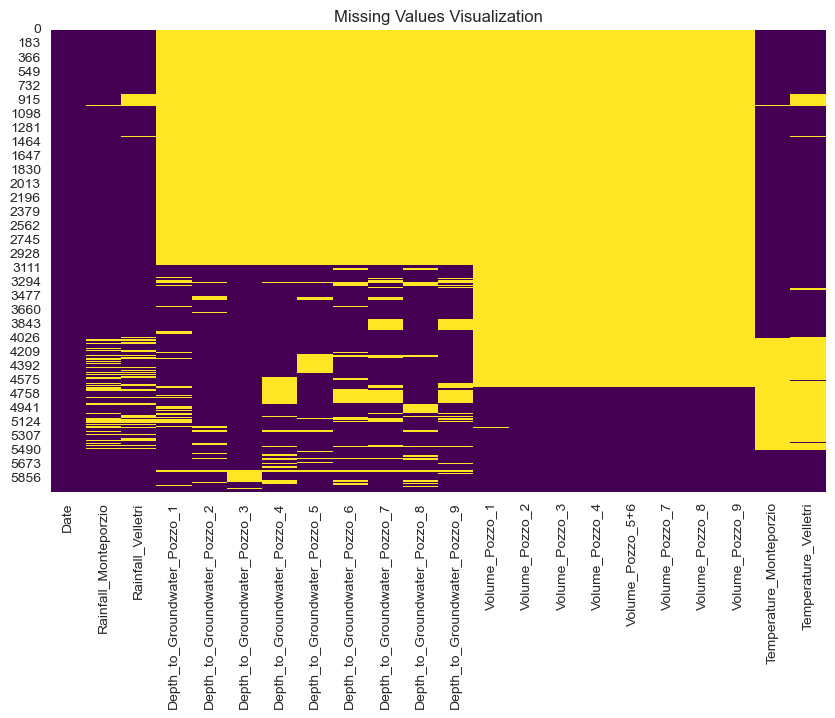

In [41]:
# 缺失值统计
missing_counts = df.isnull().sum()
print(missing_counts)

# 缺失值可视化
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

Date                               0
Rainfall_Monteporzio             620
Rainfall_Velletri                472
Depth_to_Groundwater_Pozzo_1     415
Depth_to_Groundwater_Pozzo_2     216
Depth_to_Groundwater_Pozzo_3     178
Depth_to_Groundwater_Pozzo_4     578
Depth_to_Groundwater_Pozzo_5     444
Depth_to_Groundwater_Pozzo_6     524
Depth_to_Groundwater_Pozzo_7     641
Depth_to_Groundwater_Pozzo_8     401
Depth_to_Groundwater_Pozzo_9     613
Volume_Pozzo_1                  1596
Volume_Pozzo_2                  1592
Volume_Pozzo_3                  1592
Volume_Pozzo_4                  1592
Volume_Pozzo_5+6                1592
Volume_Pozzo_7                  1592
Volume_Pozzo_8                  1592
Volume_Pozzo_9                  1592
Temperature_Monteporzio         1456
Temperature_Velletri            1462
dtype: int64


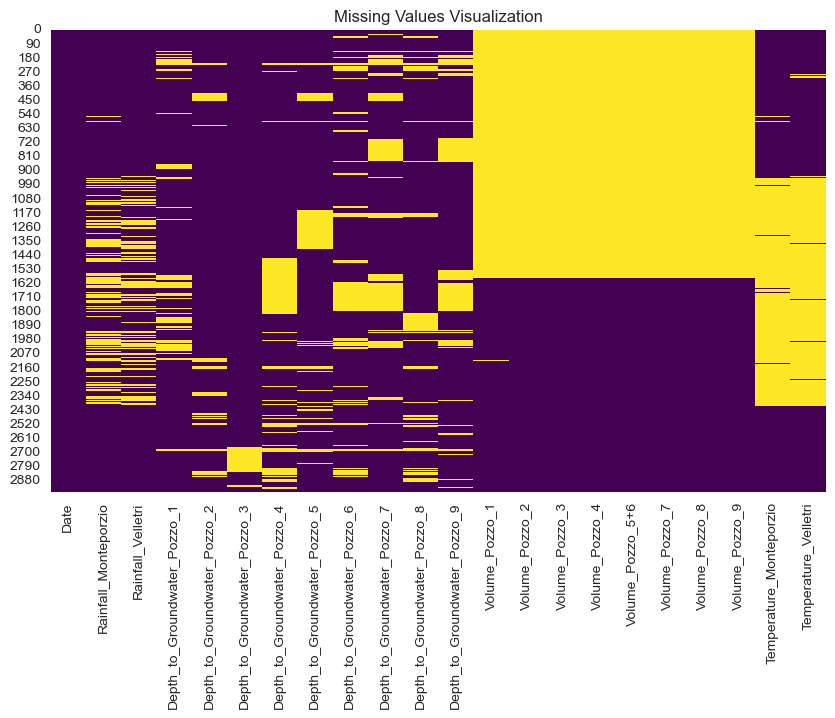

In [42]:
# 设置日期列为索引，去除2006-01-01之前的数据
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)
df = df['2012-06-01':]
df.reset_index(inplace=True)
# 缺失值统计
missing_counts = df.isnull().sum()
print(missing_counts)

# 缺失值可视化
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

Date                              0
Rainfall_Monteporzio            202
Rainfall_Velletri               159
Depth_to_Groundwater_Pozzo_1      0
Depth_to_Groundwater_Pozzo_2      0
Depth_to_Groundwater_Pozzo_3      0
Depth_to_Groundwater_Pozzo_4      0
Depth_to_Groundwater_Pozzo_5      0
Depth_to_Groundwater_Pozzo_6      0
Depth_to_Groundwater_Pozzo_7      0
Depth_to_Groundwater_Pozzo_8      0
Depth_to_Groundwater_Pozzo_9      0
Volume_Pozzo_1                  752
Volume_Pozzo_2                  752
Volume_Pozzo_3                  752
Volume_Pozzo_4                  752
Volume_Pozzo_5+6                752
Volume_Pozzo_7                  752
Volume_Pozzo_8                  752
Volume_Pozzo_9                  752
Temperature_Monteporzio         498
Temperature_Velletri            499
dtype: int64


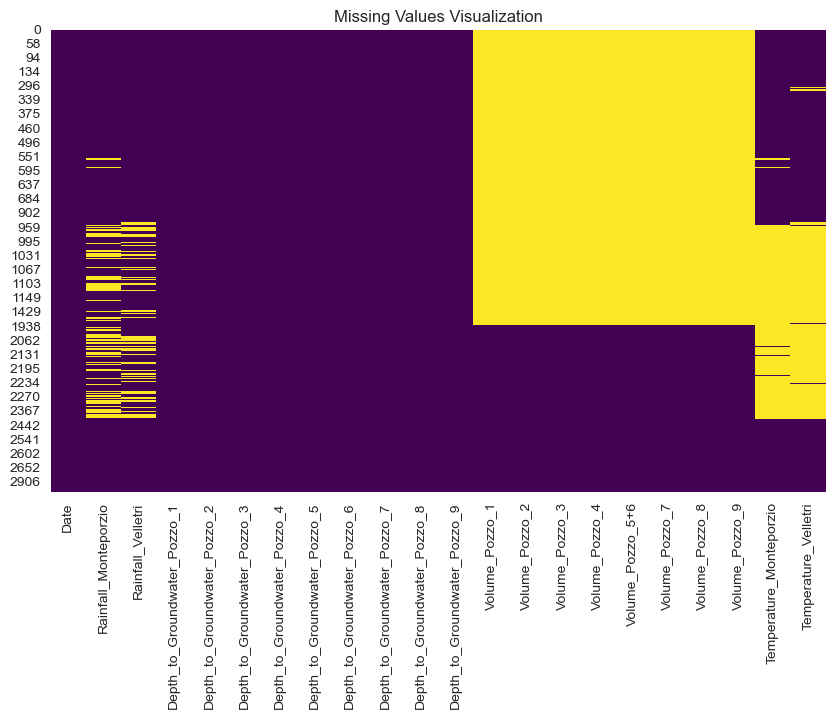

In [43]:
df.dropna(subset=['Depth_to_Groundwater_Pozzo_1',
                  'Depth_to_Groundwater_Pozzo_2',
                  'Depth_to_Groundwater_Pozzo_3',
                  'Depth_to_Groundwater_Pozzo_4',
                  'Depth_to_Groundwater_Pozzo_5',
                  'Depth_to_Groundwater_Pozzo_6',
                  'Depth_to_Groundwater_Pozzo_7',
                  'Depth_to_Groundwater_Pozzo_8',
                  'Depth_to_Groundwater_Pozzo_9'],
           inplace=True)
# 缺失值统计
missing_counts = df.isnull().sum()
print(missing_counts)

# 缺失值可视化
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

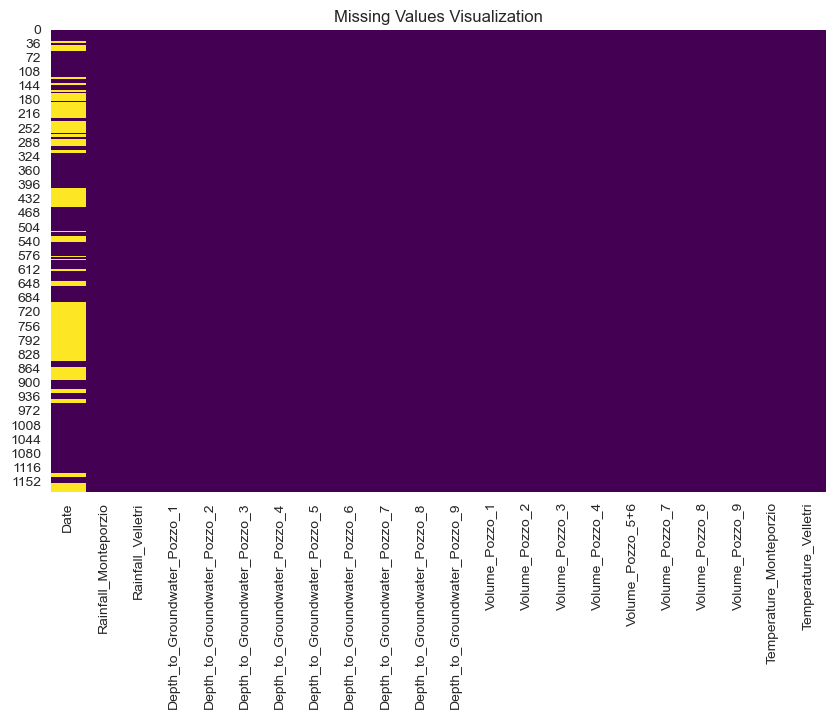

In [44]:
import pandas as pd
from sklearn.impute import KNNImputer

missing_percentage = df.isnull().sum() / len(df)
cols_to_drop = missing_percentage[missing_percentage > 0.8].index
data_cleaned = df.drop(columns=cols_to_drop)

# 从数据集中分离出日期列
date_col = data_cleaned['Date']
data_no_date = data_cleaned.drop(columns=['Date'])

# 使用KNN填充法对数值列的缺失值进行填充
imputer = KNNImputer(n_neighbors=5)
data_filled = imputer.fit_transform(data_no_date)

# 将填充后的数据转换回DataFrame
data_filled_df = pd.DataFrame(data_filled, columns=data_no_date.columns)

# 将日期列添加回填充后的数据
data_filled_df['Date'] = date_col

# 重新排列列，以保持 'Date' 在最前面
data_filled_df = data_filled_df[data_cleaned.columns]
data_cleaned=data_filled_df

plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Visualization')
plt.show()

# 检查缺失值处理后的数据
data_cleaned.isnull().sum()
df =data_cleaned

发现缺失值现象基本得到解决  
接下来观察实际数据曲线

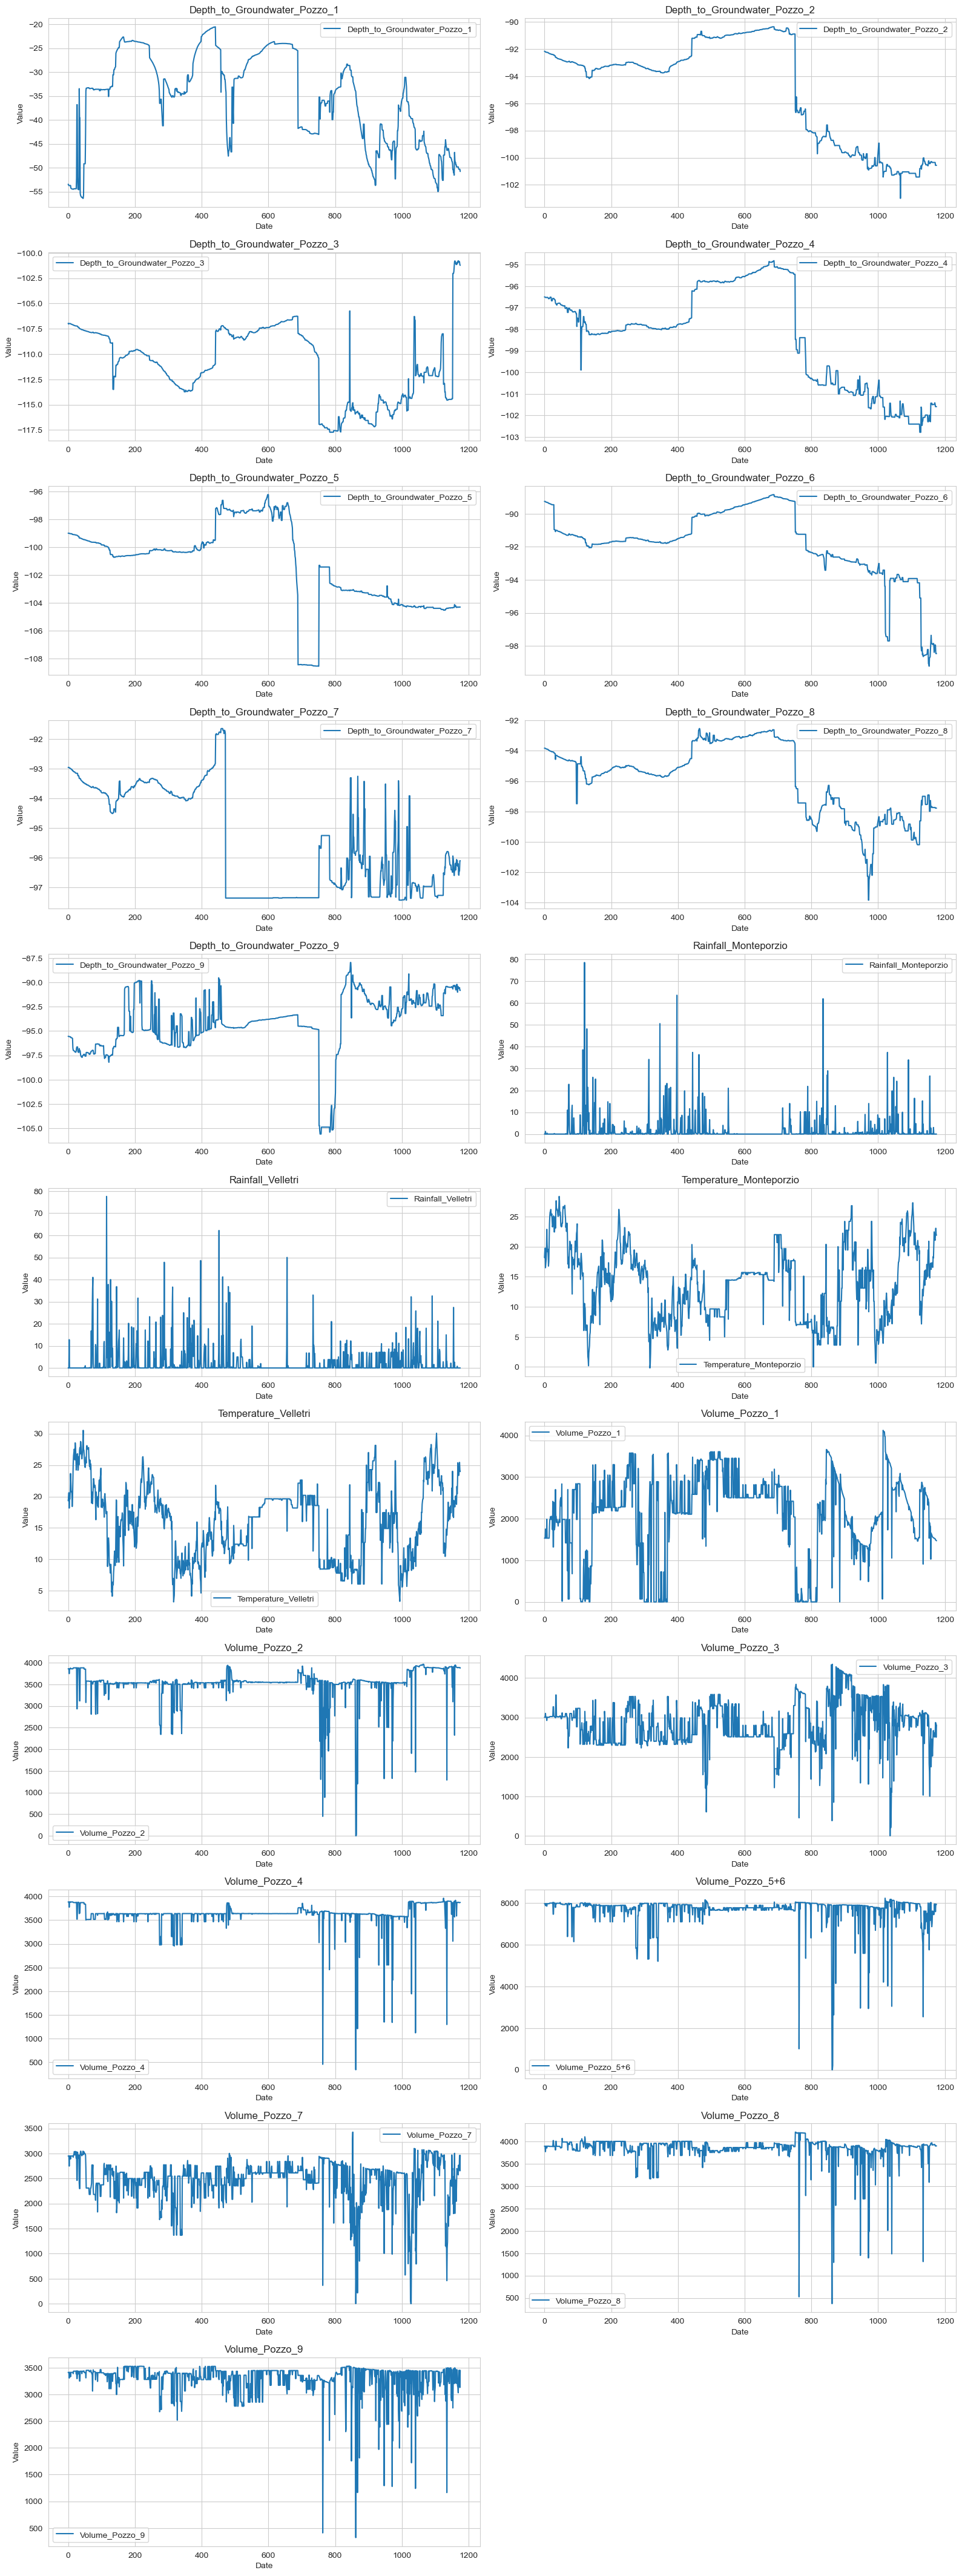

In [45]:
# 获取除了标签列之外的所有数据列
data_columns = df.columns.difference(['Date'])  # 使用填充后的 DataFrame

# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的折线图
for column in data_columns:
    plt.subplot(13, 2, data_columns.get_loc(column) + 1)
    sns.lineplot(data=df, x=df.index, y=column, label=column)
    plt.title(column)
    plt.xlabel('Date')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()

观察箱线图

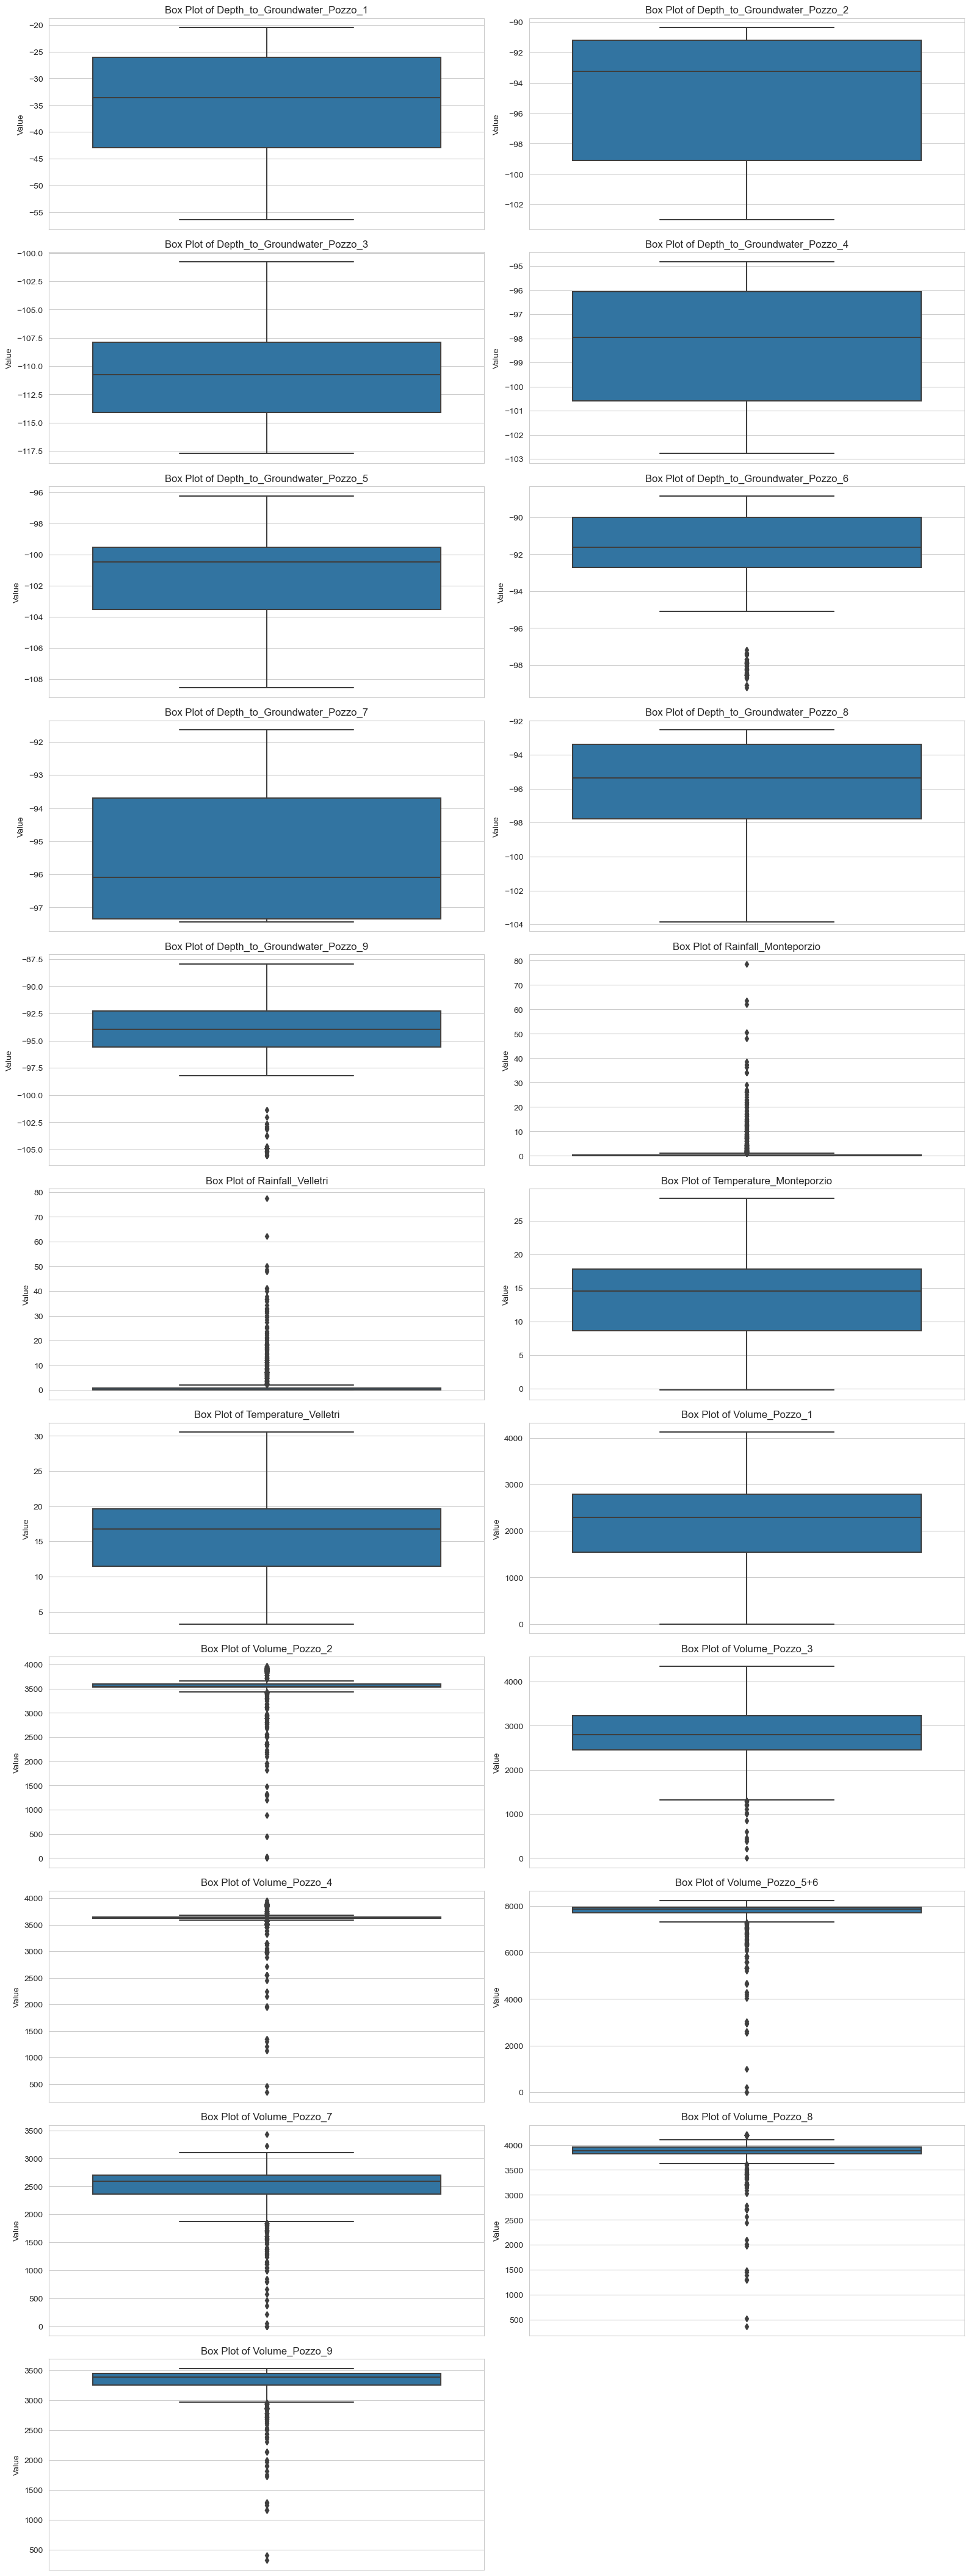

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 获取除了标签列之外的所有数据列
data_columns = df.columns.difference(['Date'])  # 使用填充后的 DataFrame

# 使用Seaborn设置样式
sns.set_style("whitegrid")

# 创建一个图形
plt.figure(figsize=(16, 50))

# 循环遍历每个数据列并绘制它们的箱线图
for i, column in enumerate(data_columns):
    plt.subplot(13, 2, i + 1)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()


#### 模型搭建
标准化数据集

In [47]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# 选择目标列
target_columns = ['Depth_to_Groundwater_Pozzo_1',
                  'Depth_to_Groundwater_Pozzo_2',
                  'Depth_to_Groundwater_Pozzo_3',
                  'Depth_to_Groundwater_Pozzo_4',
                  'Depth_to_Groundwater_Pozzo_5',
                  'Depth_to_Groundwater_Pozzo_6',
                  'Depth_to_Groundwater_Pozzo_7',
                  'Depth_to_Groundwater_Pozzo_8',
                  'Depth_to_Groundwater_Pozzo_9']

# 选择特征列，即除了目标列以外的所有列
features = [col for col in df.columns if col not in target_columns and col !='Date']

X = df[features].values
y = df[target_columns].values

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)


划分训练和测试集

In [48]:
import numpy as np

# 假设你的X_train和y_train的形状为 (samples, features)，其中samples是样本数，features是特征数
# 假设time_steps为7
time_steps = 7  # 时间窗口大小设置为一周的数据点数
# 定义一个函数来将数据按时间窗口大小切割成序列
def create_sequences(X, y, time_steps):
    X_sequences, y_sequences = [], []
    for i in range(len(X) - time_steps):
        X_sequences.append(X[i:i+time_steps])
        y_sequences.append(y[i+time_steps])
    return np.array(X_sequences), np.array(y_sequences)

# 调用函数来生成序列数据
X_sequences, y_sequences = create_sequences(X, y, time_steps)
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=0)
# 检查数据形状
print(X_train.shape)  # 应该为 (samples, time_steps, features)

# 现在你可以使用 X_train 和 y_train 来训练模型

(935, 7, 12)


##### 搭建LSTM模型

In [49]:
from tensorflow.keras.layers import Bidirectional, LSTM

# 创建双向循环神经网络模型

LSTMmodel = Sequential()
LSTMmodel.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(time_steps, 12)))
LSTMmodel.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))
LSTMmodel.add(Bidirectional(LSTM(16, activation='relu')))
LSTMmodel.add(Dense(len(target_columns)))

# 编译模型
LSTMmodel.compile(optimizer='adam', loss='mean_squared_error')


训练模型

In [50]:
# 训练模型
LSTMmodel.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2)

# 在测试集上评估模型
loss = LSTMmodel.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")




Epoch 1/300
24/24 [==============================] - 4s 25ms/step - loss: 0.9298 - val_loss: 0.8843
Epoch 2/300
24/24 [==============================] - 0s 7ms/step - loss: 0.7491 - val_loss: 0.6374
Epoch 3/300
24/24 [==============================] - 0s 7ms/step - loss: 0.5668 - val_loss: 0.4859
Epoch 4/300
24/24 [==============================] - 0s 7ms/step - loss: 0.3896 - val_loss: 0.3329
Epoch 5/300
24/24 [==============================] - 0s 8ms/step - loss: 0.2975 - val_loss: 0.2900
Epoch 6/300
24/24 [==============================] - 0s 7ms/step - loss: 0.2473 - val_loss: 0.2273
Epoch 7/300
24/24 [==============================] - 0s 7ms/step - loss: 0.2090 - val_loss: 0.2220
Epoch 8/300
24/24 [==============================] - 0s 7ms/step - loss: 0.1885 - val_loss: 0.1798
Epoch 9/300
24/24 [==============================] - 0s 7ms/step - loss: 0.1603 - val_loss: 0.1690
Epoch 10/300
24/24 [==============================] - 0s 7ms/step - loss: 0.1566 - val_loss: 0.1530
Epoch 11

保存数据

In [51]:
lstm_predictions = LSTMmodel.predict(X_test)


8/8 [==============================] - 0s 2ms/step


##### 使用线性回归模型

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Reshape data for linear regression (flatten the sequence dimension)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


# 创建线性回归模型（针对每个目标列）
models = [LinearRegression() for _ in range(y_train.shape[1])]

# 训练模型
for i, model in enumerate(models):
    model.fit(X_train_flat, y_train[:, i])

# 在测试集上进行预测
predictions = [model.predict(X_test_flat) for model in models]

# 计算每个目标列的均方误差（MSE）作为评估指标
mse_scores = [mean_squared_error(y_test[:, i], pred) for i, pred in enumerate(predictions)]

# 输出每个目标列的MSE
for i, target_column in enumerate(target_columns):
    print(f"MSE for {target_column}: {mse_scores[i]}")
print(f"Total MSE : {sum(mse_scores)/9}")



MSE for Depth_to_Groundwater_Pozzo_1: 0.4810213708528484
MSE for Depth_to_Groundwater_Pozzo_2: 0.680400657621118
MSE for Depth_to_Groundwater_Pozzo_3: 0.478320544203516
MSE for Depth_to_Groundwater_Pozzo_4: 0.678831630128268
MSE for Depth_to_Groundwater_Pozzo_5: 0.8284374244465018
MSE for Depth_to_Groundwater_Pozzo_6: 0.5618053705911439
MSE for Depth_to_Groundwater_Pozzo_7: 0.7890216181289129
MSE for Depth_to_Groundwater_Pozzo_8: 0.6822129725165134
MSE for Depth_to_Groundwater_Pozzo_9: 0.8398172213450903
Total MSE : 0.668874312203768


保留预测结果

In [53]:
true_values= y_test
linear_predictions = predictions

##### 搭建xgboost模型

In [54]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error

# 创建XGBoost回归模型
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)

# 将数据重新整形为适合XGBoost的形状
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 训练模型
model.fit(X_train_flat, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test_flat)

# 计算均方误差（MSE）作为评估指标
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 计算MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 0.1729494394310485
Mean Absolute Error (MAE): 0.24405994872738368


In [55]:
xgboost_predictions=y_pred

##### 搭建arima模型

对两种模型性能进行直观比较

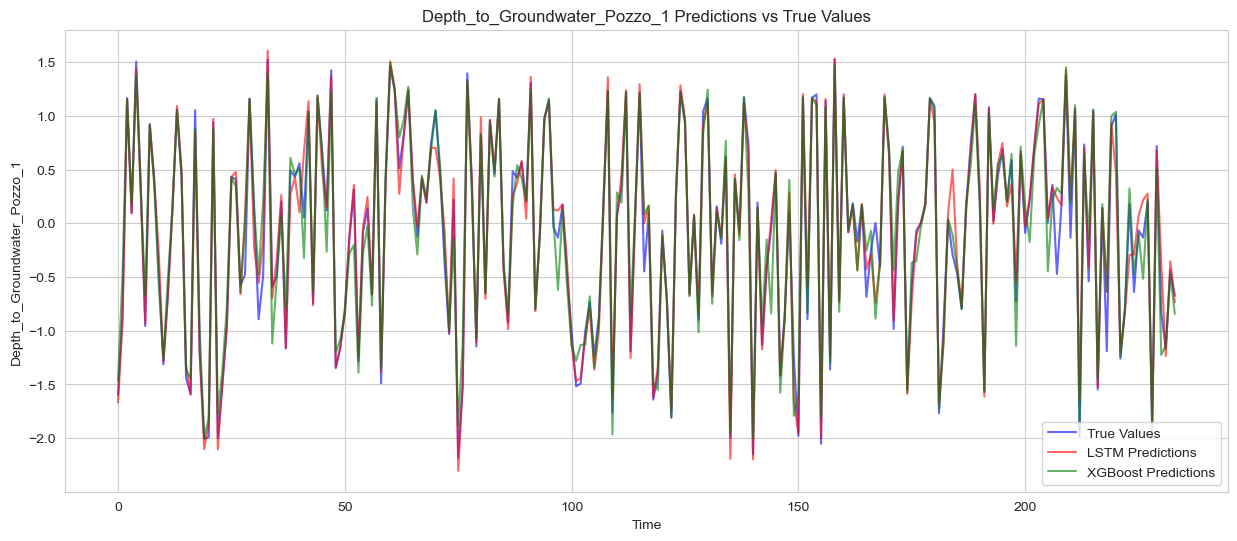

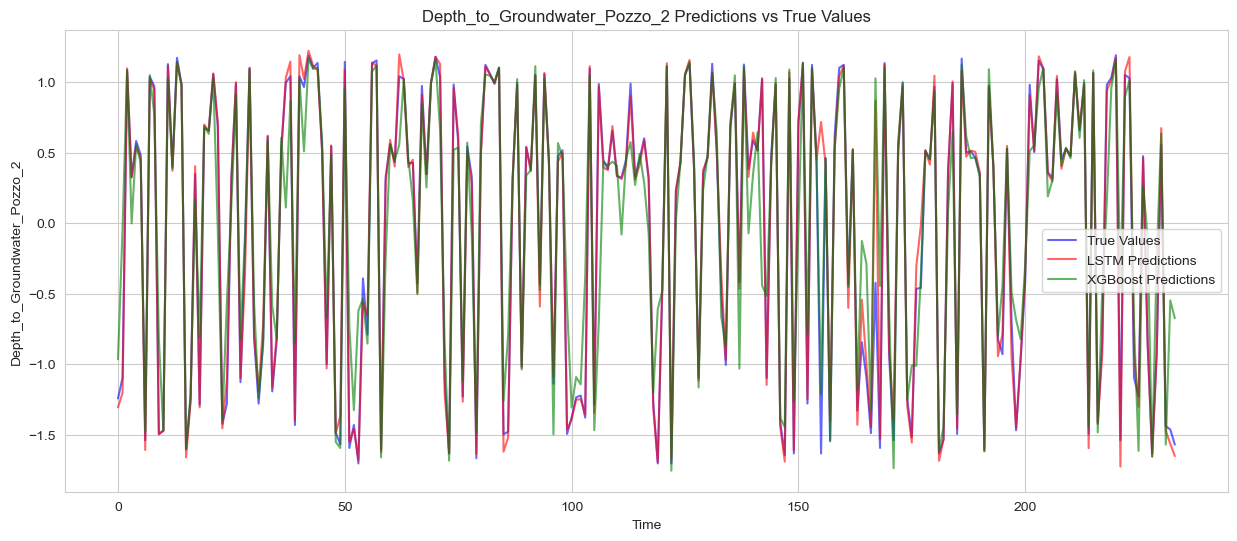

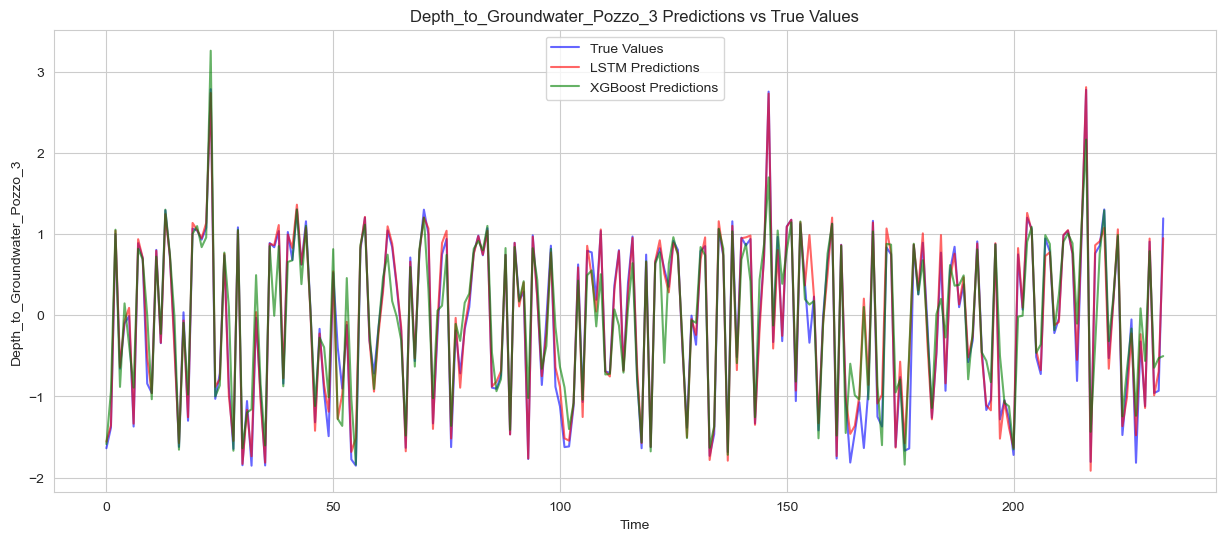

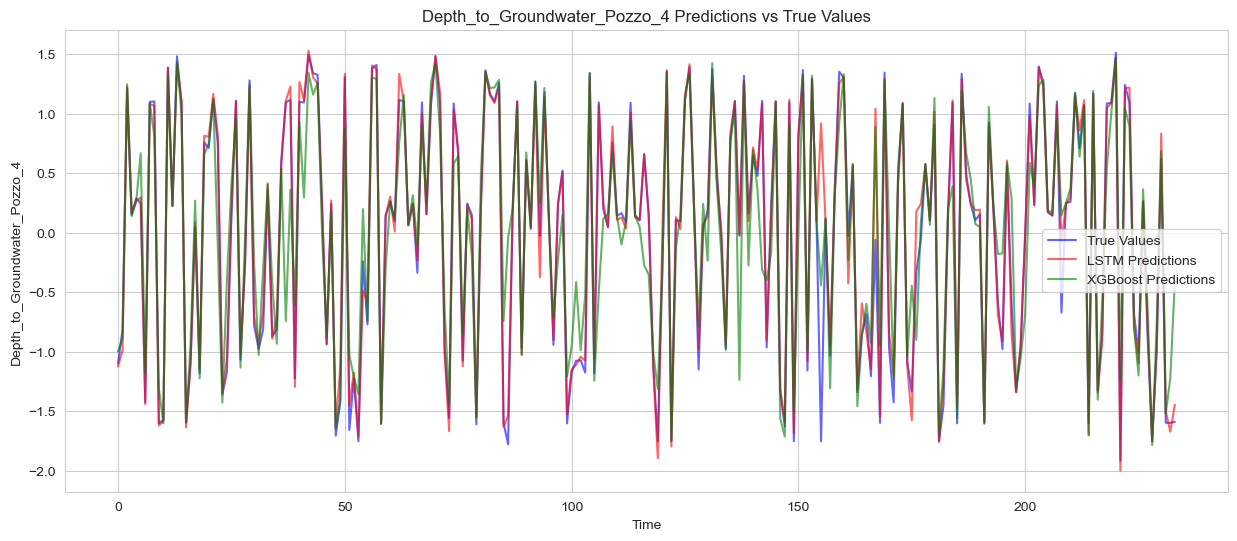

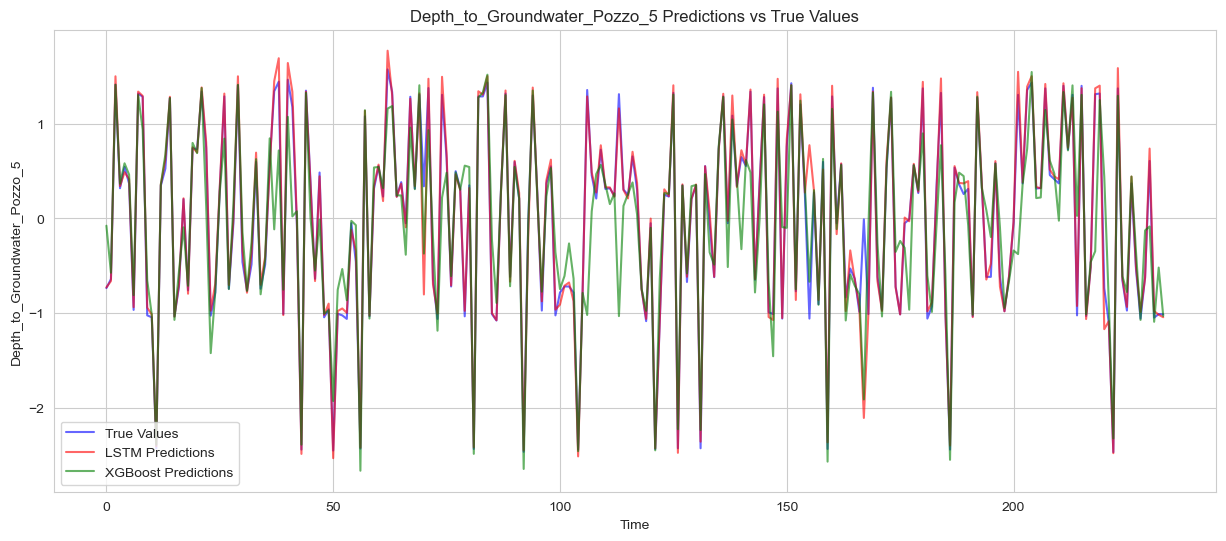

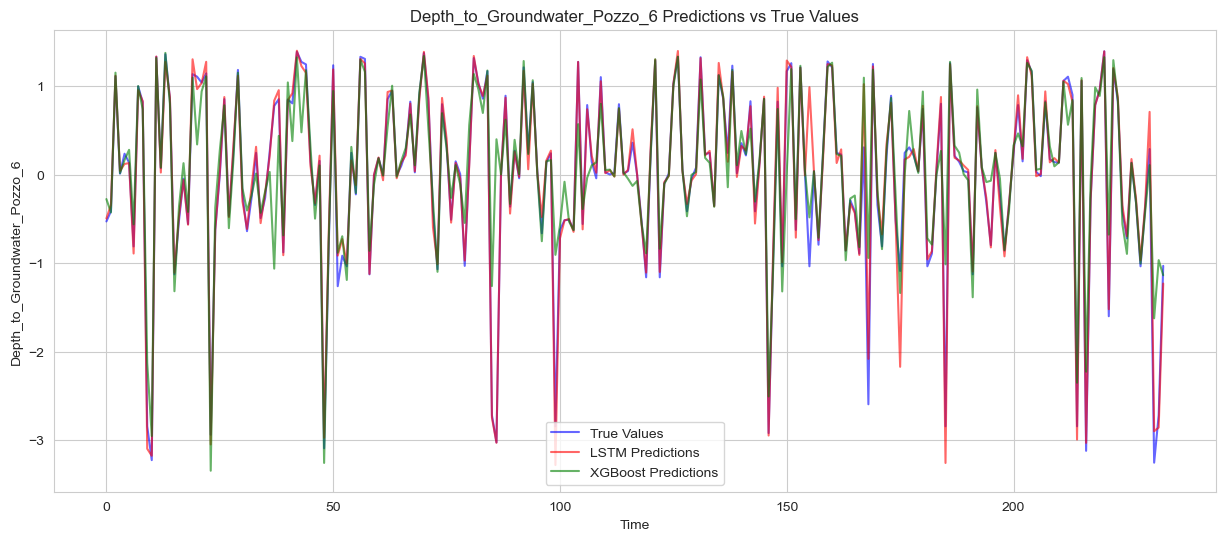

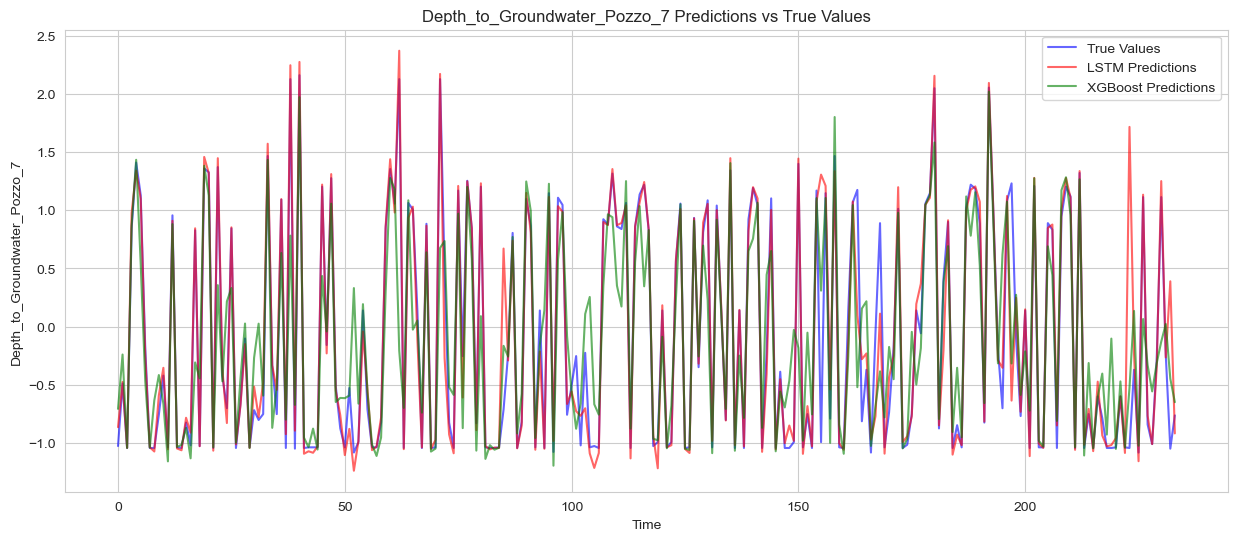

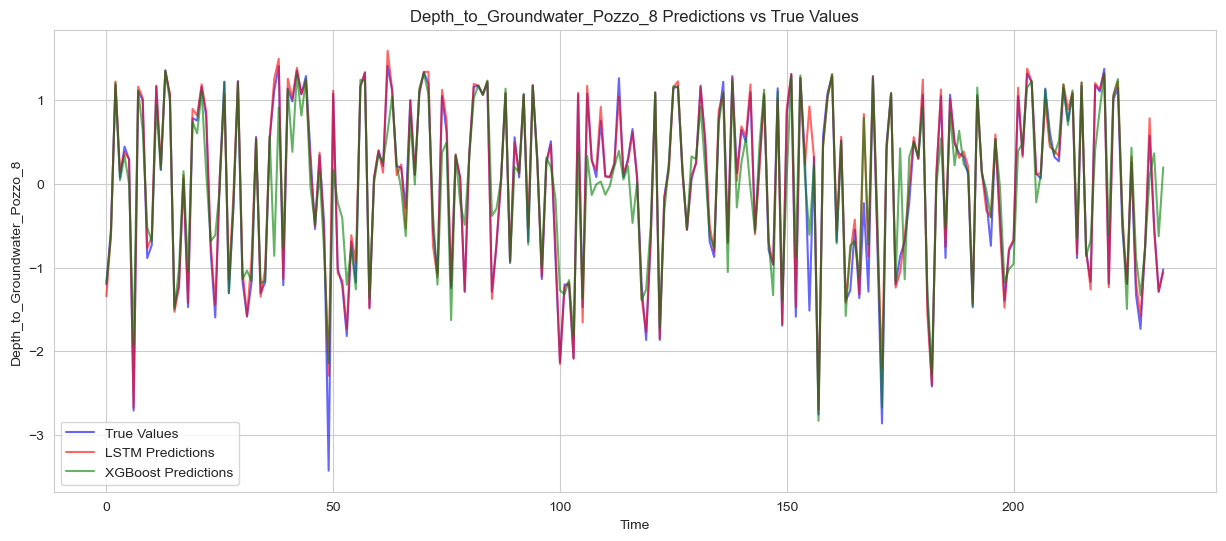

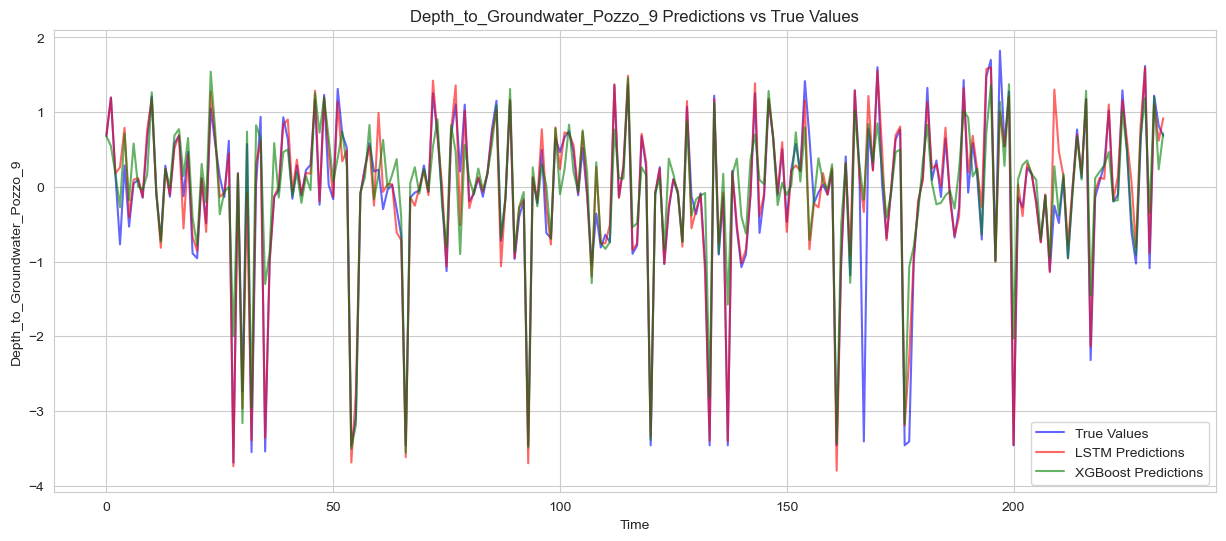

In [57]:
import matplotlib.pyplot as plt

# 为每一列数据生成图表
for i, target_column in enumerate(target_columns):
    # 获取真实值、LSTM模型预测值和线性回归模型预测值
    true_values = y_test[:, i]
    lstm_predictions_column = lstm_predictions[:, i]  # 获取第 i 列的LSTM预测值
    xgboost_predictions_column = xgboost_predictions[:, i]  # 获取第 i 列的线性回归预测值

    # 创建时间序列
    time_series = range(len(true_values))

    # 创建一个新的图表
    plt.figure(figsize=(15, 6))

    # 绘制真实值
    plt.plot(time_series, true_values, label='True Values', color='blue', alpha=0.6)

    # 绘制LSTM模型预测值
    plt.plot(time_series, lstm_predictions_column, label='LSTM Predictions', color='red', alpha=0.6)

    # 绘制线性回归模型预测值
    plt.plot(time_series, xgboost_predictions_column, label='XGBoost Predictions', color='green', alpha=0.6)

    # 设置标题和标签
    plt.title(f'{target_column} Predictions vs True Values')
    plt.xlabel('Time')
    plt.ylabel(target_column)

    # 添加图例
    plt.legend()

    # 显示图表
    plt.show()
